### Importing the libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the file and Performing Exploratory Data Analysis

In [56]:
cr = pd.read_csv(r"C:\Users\Priya\Downloads\CreditRisk.csv")

In [57]:
## Problem statement : Predict the loan status of the customer

In [58]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [59]:
cr.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
976,LP002971,Male,Yes,4.0,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
977,LP002975,Male,Yes,0.0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
978,LP002980,Male,No,0.0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y
979,LP002986,Male,Yes,0.0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,N
980,LP002989,Male,No,0.0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,Y


In [60]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    float64
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 99.8+ KB


In [61]:
cr.shape

(981, 13)

In [62]:
cr.nunique()

Loan_ID              981
Gender                 2
Married                2
Dependents             5
Education              2
Self_Employed          2
ApplicantIncome      752
CoapplicantIncome    437
LoanAmount           232
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [63]:
cr.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [64]:
cr.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,956.000000,981.000000,981.000000,954.000000,961.000000,902.000000
mean,0.881799,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,1.255623,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,0.000000,9.000000,6.000000,0.000000
25%,0.000000,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,2.000000,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,4.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


### Data Cleaning

In [65]:
cr.Gender.fillna('Male', inplace = True)
cr.Married.fillna('No', inplace = True)
cr.Dependents.fillna(0, inplace = True)
cr.LoanAmount.fillna(cr.LoanAmount.mean(), inplace = True)
cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean(), inplace = True)
cr.Credit_History.fillna(0, inplace = True)
cr.Self_Employed.fillna('No', inplace = True)

In [66]:
cr.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [67]:
##After data cleaning no nulls found

In [68]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y


In [69]:
# Dropping the column that is not required

In [70]:
cr = cr.drop(['Loan_ID'], axis=1)

In [71]:
cr.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y


### Transforming the labels into numbers



In [72]:
cr.Loan_Status.replace({'Y': 1, 'N': 0}, inplace = True)
cr.Married.replace({'No': 0, 'Yes': 1}, inplace = True)
cr.Education.replace({'Graduate': 1, 'Not Graduate': 0}, inplace = True)
cr.Self_Employed.replace({'No': 0, 'Yes': 1}, inplace = True)
cr.Property_Area.replace({'Urban': 0, 'Rural': 1, 'Semiurban': 2}, inplace = True)
cr.Gender.replace({'Male': 1, 'Female': 0}, inplace = True)

In [73]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    int64  
 1   Married            981 non-null    int64  
 2   Dependents         981 non-null    float64
 3   Education          981 non-null    int64  
 4   Self_Employed      981 non-null    int64  
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    float64
 9   Credit_History     981 non-null    float64
 10  Property_Area      981 non-null    int64  
 11  Loan_Status        981 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 92.1 KB


In [74]:
from sklearn.model_selection import train_test_split

cr_train, cr_test = train_test_split(cr, test_size=.2)

#Code for oversampling
df1 = cr_train[cr_train.Loan_Status == 0]
cr_train = pd.concat([cr_train, df1,df1])

cr_train_x = cr_train.iloc[:, 0:-1]
cr_train_y = cr_train.iloc[:,-1]

cr_test_x = cr_test.iloc[:,0:-1]
cr_test_y = cr_test.iloc[: ,-1]

### Model Building

In [75]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(cr_train_x, cr_train_y) 

C:\Users\Priya\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
pred_test = logreg.predict(cr_test_x)
pred_train = logreg.predict(cr_train_x)

In [77]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, classification_report
#OR
#from sklearn.metrics import *

In [78]:
tab = confusion_matrix(cr_test_y, pred_test)
tab

array([[ 36,  13],
       [ 19, 129]], dtype=int64)

In [79]:
print(classification_report(cr_test_y, pred_test))

              precision    recall  f1-score   support

           0       0.65      0.73      0.69        49
           1       0.91      0.87      0.89       148

    accuracy                           0.84       197
   macro avg       0.78      0.80      0.79       197
weighted avg       0.85      0.84      0.84       197



In [80]:
tab.diagonal().sum() * 100 / tab.sum() # Another way to get accuray

83.75634517766497

In [81]:
recall_score(cr_test_y, pred_test)

0.8716216216216216

In [82]:
precision_score(cr_test_y, pred_test)

0.9084507042253521

In [83]:
tab1 = pd.DataFrame(tab)

In [84]:
tab1

,0,1
0,36,13
1,19,129


In [85]:
tab1.columns = ['Loan_Rej', 'Loan_Approved']
tab1.index = ['Loan_Rej', 'Loan_Approved']
tab1

,Loan_Rej,Loan_Approved
Loan_Rej,36,13
Loan_Approved,19,129


## Conclusion:
### The logistic regression model achieved an accuracy of 84% in predicting loan statuses. The confusion matrix indicates the following performance:

**<b>--True Positives (Loan Approved correctly predicted): 129 cases</b>**<br>
**<b>--True Negatives (Loan Rejected correctly predicted): 36 cases</b>**<br>
**<b>--False Positives (Loan Rejected incorrectly predicted as Approved): 13 cases</b>**<br>
**<b>--False Negatives (Loan Approved incorrectly predicted as Rejected): 19 cases</b>**<br>

In [88]:
# We can go for AUROC curve i.e area under the ROC curve to know about performnace of the model better

In [89]:
pred_prob = logreg.predict_proba(cr_test_x)

In [90]:
pred_prob.shape

(197, 2)

In [91]:
pred_prob # 1st column is class 0 and 2nd col is class 1
# class 0 means q and class 1 is p

array([[0.39107644, 0.60892356],
       [0.48751778, 0.51248222],
       [0.48682537, 0.51317463],
       [0.42358452, 0.57641548],
       [0.43962063, 0.56037937],
       [0.50703268, 0.49296732],
       [0.53051156, 0.46948844],
       [0.3445656 , 0.6554344 ],
       [0.36309533, 0.63690467],
       [0.33162573, 0.66837427],
       [0.47503087, 0.52496913],
       [0.85185873, 0.14814127],
       [0.3876772 , 0.6123228 ],
       [0.43579015, 0.56420985],
       [0.39256092, 0.60743908],
       [0.51920571, 0.48079429],
       [0.09239062, 0.90760938],
       [0.86902866, 0.13097134],
       [0.85333754, 0.14666246],
       [0.3493028 , 0.6506972 ],
       [0.48230874, 0.51769126],
       [0.53432247, 0.46567753],
       [0.26268729, 0.73731271],
       [0.30064681, 0.69935319],
       [0.46121912, 0.53878088],
       [0.31310787, 0.68689213],
       [0.11208346, 0.88791654],
       [0.33835788, 0.66164212],
       [0.19591643, 0.80408357],
       [0.55964054, 0.44035946],
       [0.

In [92]:
from sklearn.metrics import roc_curve, roc_auc_score

In [93]:
roc_auc_score(cr_test_y, pred_prob[:,1])

0.8139823496966353

In [94]:
fpr, tpr, thre = roc_curve(cr_test_y, pred_prob[:,1])

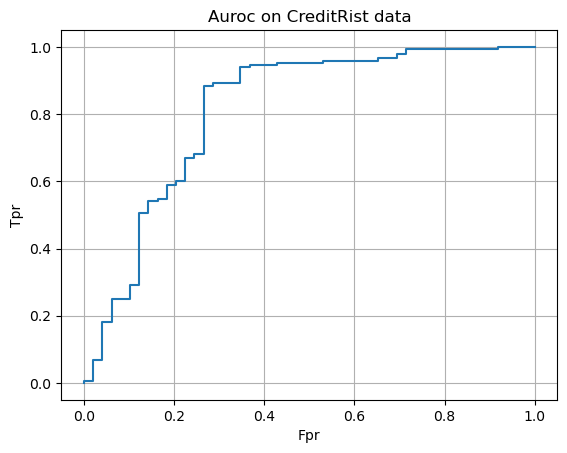

In [95]:
plt.plot(fpr,tpr)
plt.xlabel("Fpr")
plt.ylabel("Tpr")
plt.title("Auroc on CreditRist data")
plt.grid()

In [96]:
# targetting customers should be on entire database
pred_prob_full = logreg.predict_proba(cr.iloc[:, 0:-1])

In [97]:
pred_prob_full = pd.DataFrame(pred_prob_full)

In [98]:
pred_prob_full.columns = ['Prob0', 'Prob1']

In [99]:
pred_prob_full.columns = ['Prob0', 'Prob1']

In [100]:
pred_prob_full

,Prob0,Prob1
0,0.487354,0.512646
1,0.317568,0.682432
2,0.300061,0.699939
3,0.440893,0.559107
4,0.486468,0.513532
...,...,...
976,0.464233,0.535767
977,0.345863,0.654137
978,0.830349,0.169651
979,0.320966,0.679034
